In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys
sys.path.append('../')

In [3]:
from graphtime import GroupFusedGraphLasso, IndepFusedGraphLasso
from graphtime.utils import get_edges, get_change_points, plot_data_with_cps

In [4]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 7.0)

Parameters and Example Data

In [5]:
y = np.load('../data/y.npy')
sigma = np.load('../data/sigma.npy')
sigma_inv = np.load('../data/sigma_inv.npy')
T = 90 # Steps
K = 2 # Changepoints
P = 10 # Variables
M = 5 # Active Edges
eps = 0.000001 # Edge threshold epsilon

## True Changepoints

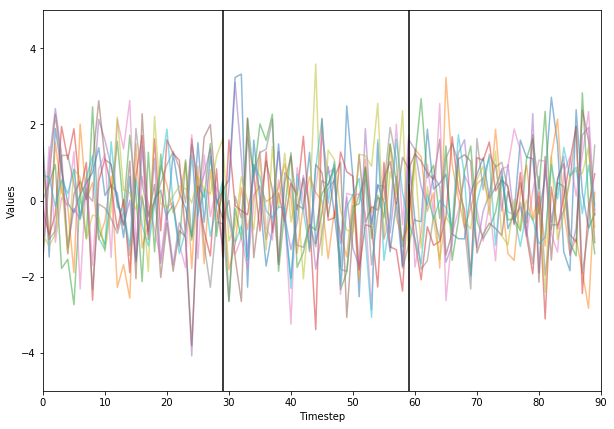

In [6]:
edges = get_edges(sigma_inv[0], eps)
change_points = get_change_points(sigma_inv, eps)
fig = plot_data_with_cps(y, change_points, ymin=-5, ymax=5)

In [7]:
verbose = False
tol = 1e-4
max_iter = 500
gammas = [1, 1, 1] # gamma_V1, gamma_V2, gamma_W
lambda1G = 0.15
lambda2G = 25
lambda1I = 0.25
lambda2I = 2

## Estimated Changepoints with GFGL smoother

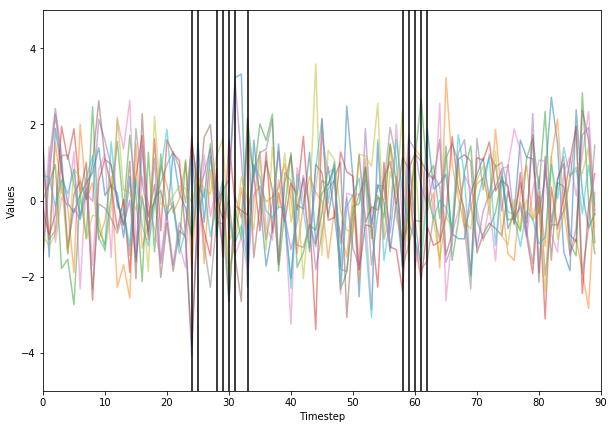

In [8]:
gfgl = GroupFusedGraphLasso(lambda1G, lambda2G, gammas[0], gammas[1], gammas[2], tol, max_iter, verbose)
gfgl.fit(y)
cps = get_change_points(gfgl.sparse_Theta, 0.01)
fig = plot_data_with_cps(y, cps, ymin=-5, ymax=5)

# Visualising Graphical Models
To visualise the estimated graphical model in comparison to the ground truth, we simply feed the $\Theta$ elements into the DynamicGraphicalModel holding a number of graphs.

In [9]:
from graphtime.simulate import DynamicGraphicalModel

Note that we only select three graphs to compare with the ground truth, i.e. those that lay inbetween the major changepoints at 30 and 60.

In [10]:
DGM = DynamicGraphicalModel.from_Thetas(sigma_inv)
DGM_est = DynamicGraphicalModel.from_Thetas(gfgl.sparse_Theta[[0, 45, 75]], eps=0.1)

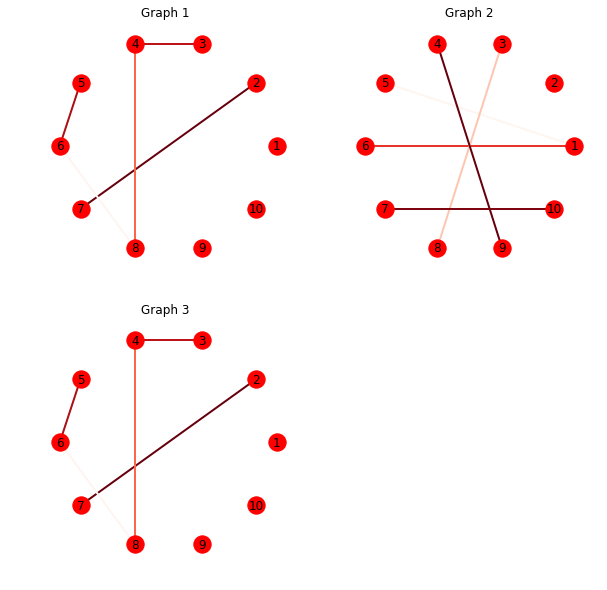

In [11]:
DGM.draw();

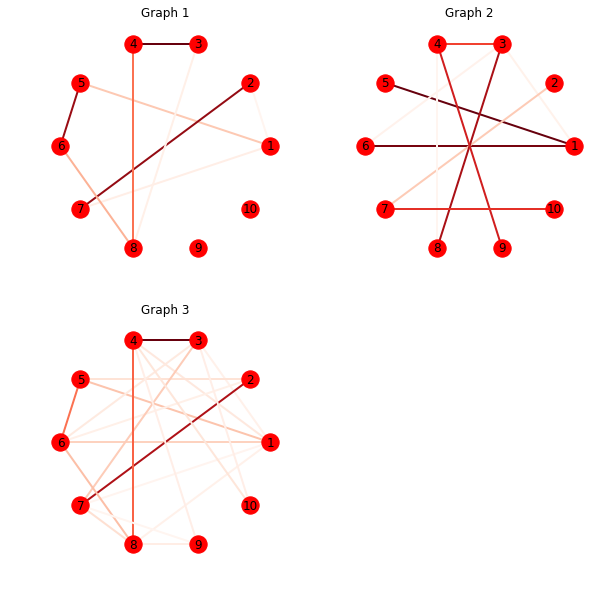

In [12]:
DGM_est.draw();

# Generating Dynamic Graphical Models

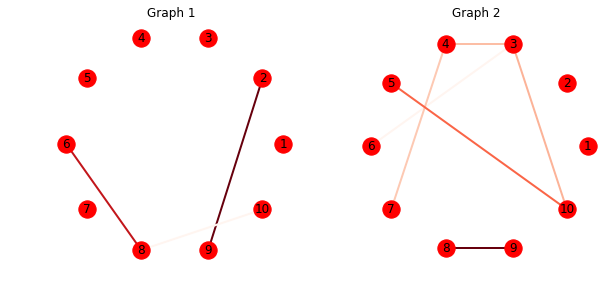

In [14]:
DGM = DynamicGraphicalModel(10)
DGM.generate_graphs(n_edges_list=[3, 6])
DGM.draw();

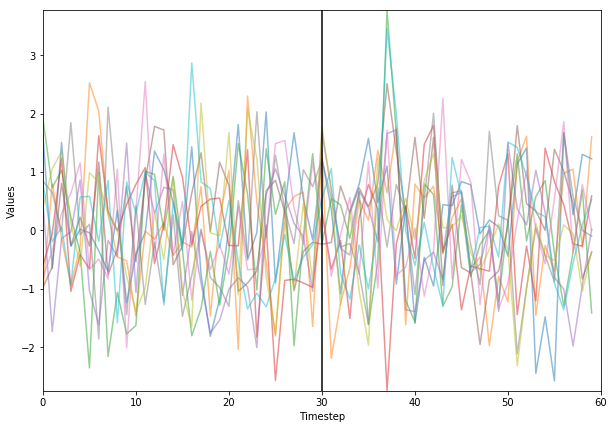

In [16]:
X = DGM.sample(60, changepoints=[30])
plot_data_with_cps(X, [30]);